# Explore here

Notas! 
No eliminar todas las variables. 
EDA = solo eliminar algunas variable (por ejemplo la mitad que hay 108). FUncion Sk --> 
EDA por encima. QUe datos tiene. Buscar outlayers.
Necesito mas variables para comparar frente al target para que el modelo prediga bien.

In [2]:
import pandas as pd

# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
data = pd.read_csv(url)

# Mostrar las primeras filas y la información del conjunto de datos
data.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
# Mostrar los nombres de las columnas
list(data.columns)


['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

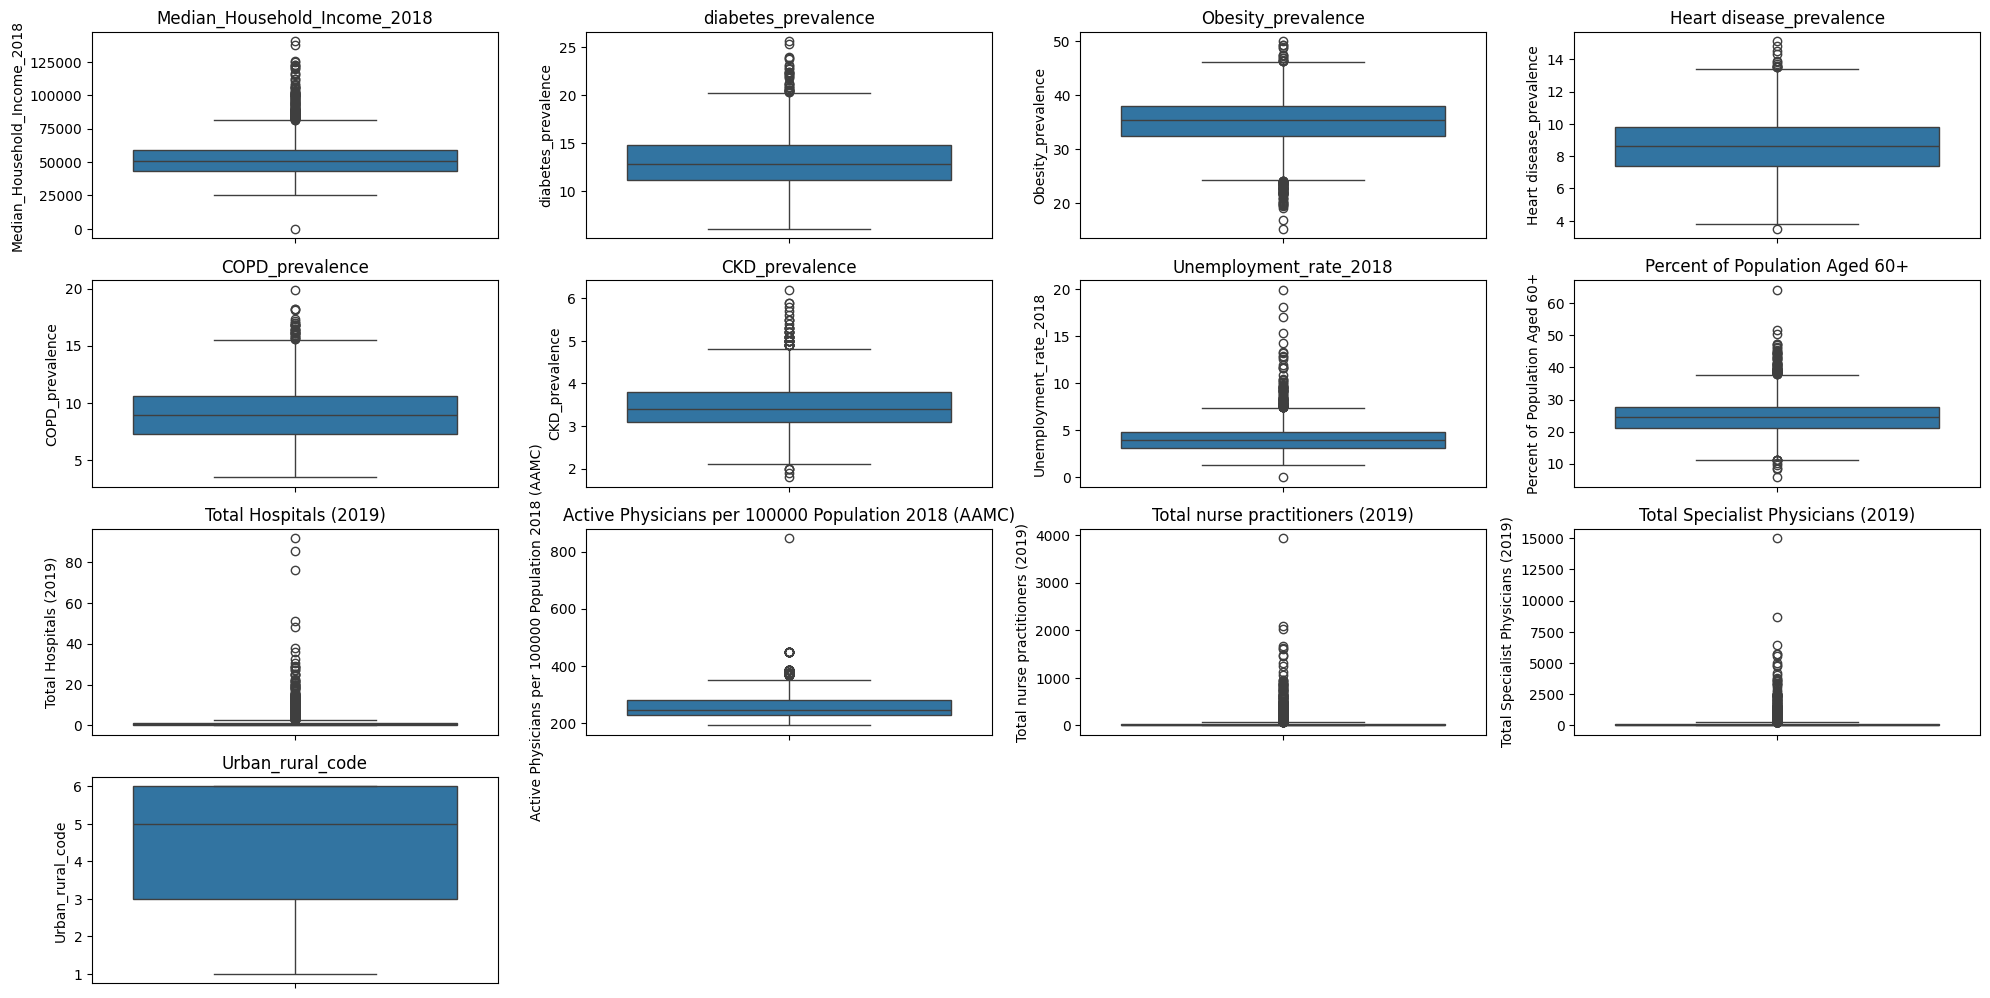

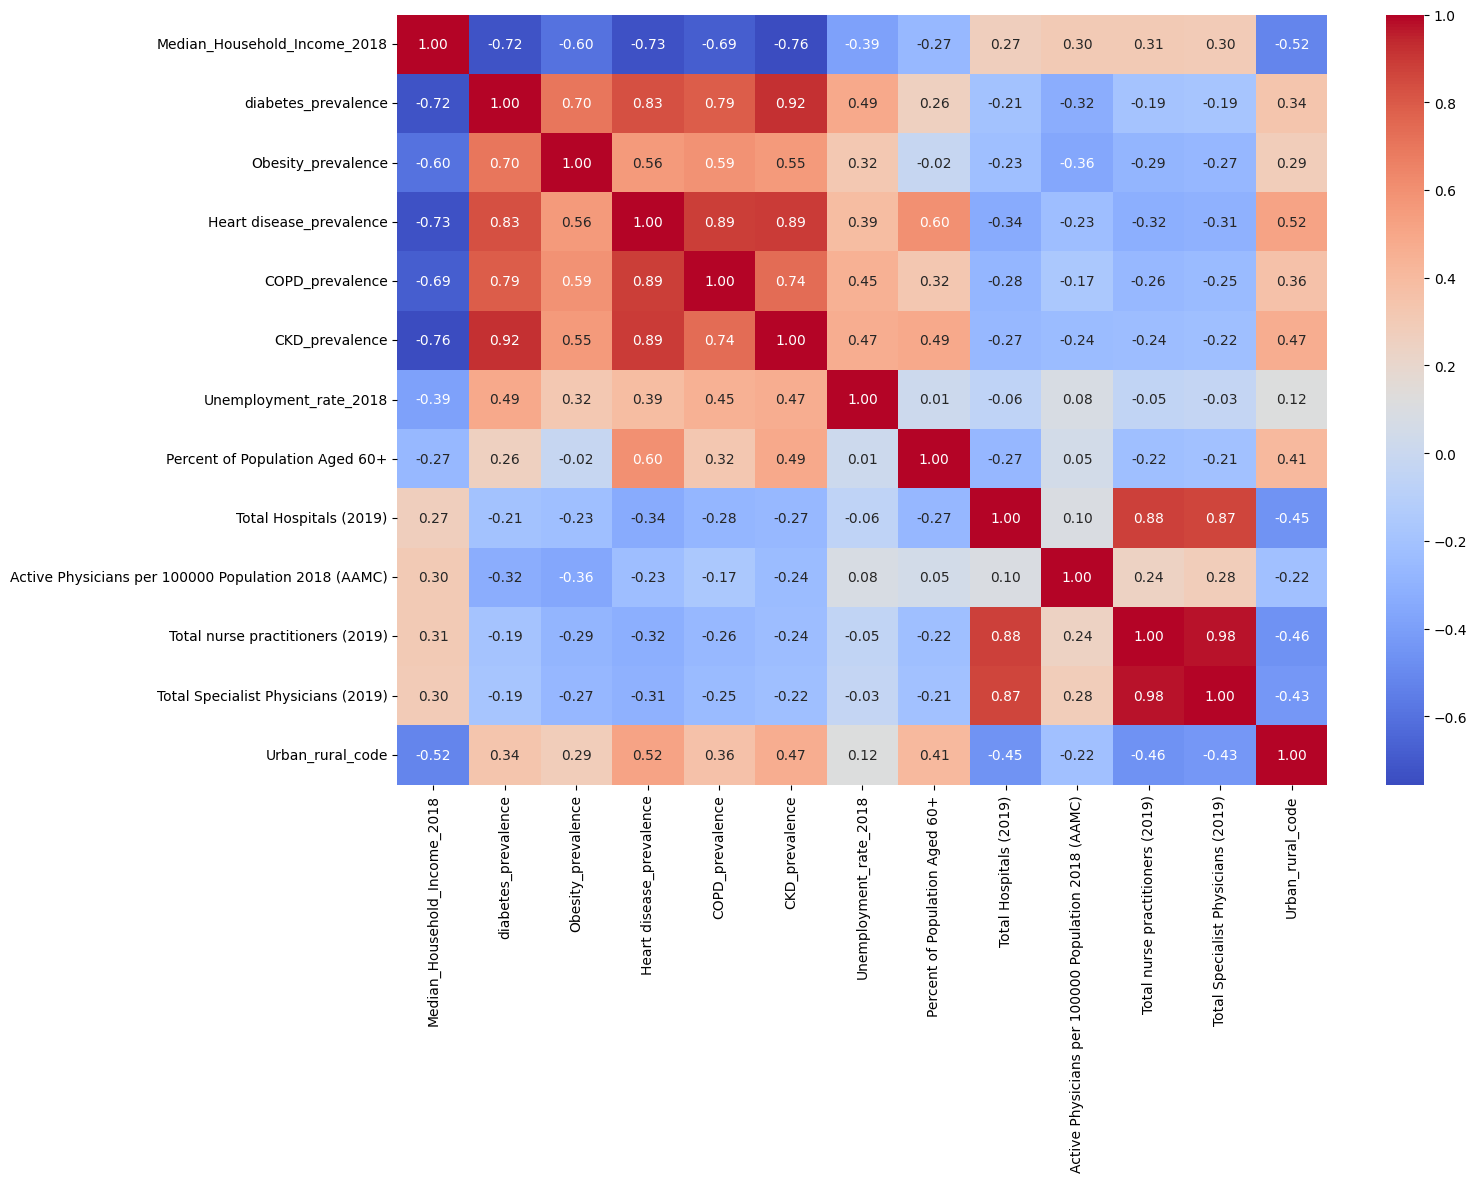

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas relevantes
selected_columns = [
    'Median_Household_Income_2018', 'diabetes_prevalence', 'Obesity_prevalence',
    'Heart disease_prevalence', 'COPD_prevalence', 'CKD_prevalence', 
    'Unemployment_rate_2018', 'Percent of Population Aged 60+', 
    'Total Hospitals (2019)', 'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total nurse practitioners (2019)', 'Total Specialist Physicians (2019)', 
    'Urban_rural_code'
]

# Crear un nuevo DataFrame con las columnas seleccionadas
data_selected = data[selected_columns]

# Mostrar las primeras filas del nuevo DataFrame
data_selected.head()


# Diagramas de caja para identificar valores atípicos
plt.figure(figsize=(20, 15))

# Subplots de box plots para varias columnas
for i, column in enumerate(selected_columns, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(y=data_selected[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# Crear la tabla de correlación
correlation_matrix = data_selected.corr()

# Mostrar la tabla de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


Modelo Regresión Lineal con las columnas seleccionadas

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Crear un nuevo DataFrame con las columnas seleccionadas
data_selected = data[selected_columns]

# Seleccionar variables dependientes e independientes
X = data_selected.drop(columns=['diabetes_prevalence'])
y = data_selected['diabetes_prevalence']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = linear_model.predict(X_train_scaled)
y_pred_test = linear_model.predict(X_test_scaled)

# Evaluar el modelo de regresión lineal
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Regresión Lineal - Train MSE: {train_mse}, Test MSE: {test_mse}, Train R2: {train_r2}, Test R2: {test_r2}')

Regresión Lineal - Train MSE: 0.4439945237928479, Test MSE: 0.42582421176401547, Train R2: 0.9388335483871433, Test R2: 0.9470575448244977


Construir modelo Lasso

In [6]:
# Entrenar el modelo Lasso
lasso_model = Lasso(alpha=0.1, max_iter=300)
lasso_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

# Evaluar el modelo Lasso
train_mse_lasso = mean_squared_error(y_train, y_pred_train_lasso)
test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)

print(f'Lasso - Train MSE: {train_mse_lasso}, Test MSE: {test_mse_lasso}, Train R2: {train_r2_lasso}, Test R2: {test_r2_lasso}')

Lasso - Train MSE: 0.5379758893354948, Test MSE: 0.5130651573846645, Train R2: 0.9258863016534052, Test R2: 0.9362109331819702


Analizar evolución r2 entre valores 0 y 20

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.577e+02, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

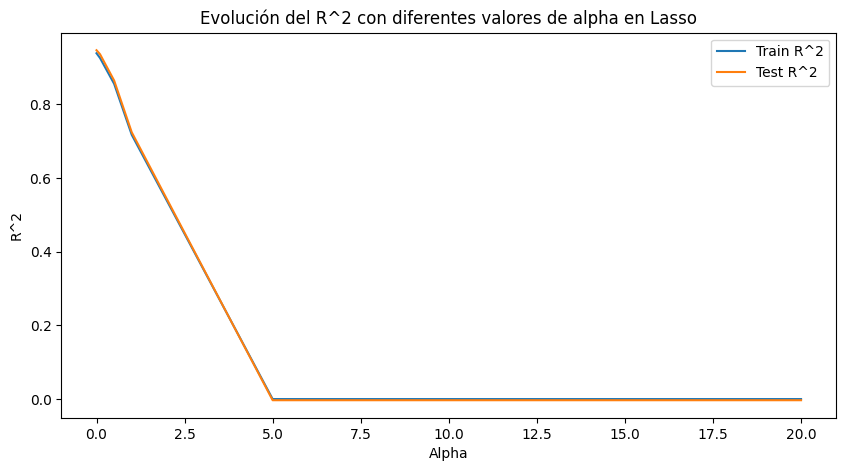

In [7]:
alphas = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
train_r2_values = []
test_r2_values = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=300)
    lasso.fit(X_train_scaled, y_train)
    train_r2_values.append(lasso.score(X_train_scaled, y_train))
    test_r2_values.append(lasso.score(X_test_scaled, y_test))

# Dibuja los valores de R^2
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_r2_values, label='Train R^2')
plt.plot(alphas, test_r2_values, label='Test R^2')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('Evolución del R^2 con diferentes valores de alpha en Lasso')
plt.legend()
plt.show()

Optimizar Modelo Lasso

In [8]:
from sklearn.model_selection import GridSearchCV

# Búsqueda de hiperparámetros para Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=300)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo
best_lasso = grid_search.best_estimator_

# Evaluar el mejor modelo
best_train_r2 = best_lasso.score(X_train_scaled, y_train)
best_test_r2 = best_lasso.score(X_test_scaled, y_test)

print(f'Mejor Lasso - Train R2: {best_train_r2}, Test R2: {best_test_r2}')

Mejor Lasso - Train R2: 0.9373522041213039, Test R2: 0.9461689369171906


Guardar ambos modelos

In [9]:
import pickle

# Guardar el modelo de regresión lineal
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

# Guardar el modelo Lasso
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)

print("Modelos guardados con éxito.")

Modelos guardados con éxito.


Gráficas comparar predicciones de ambos modelos

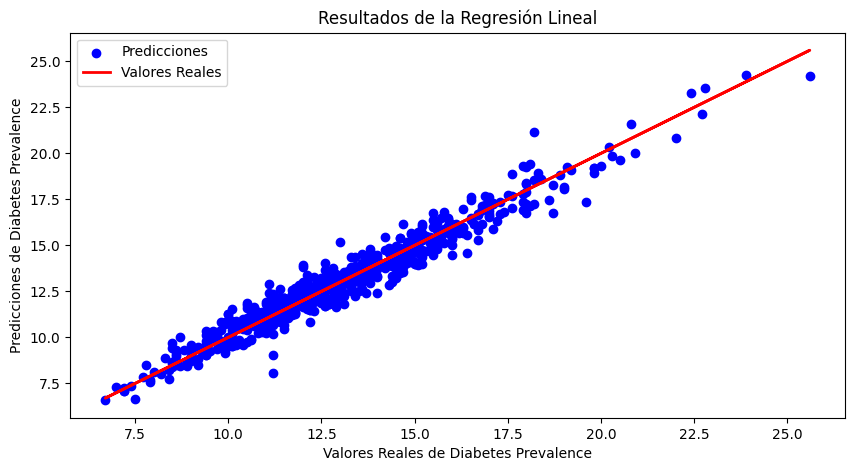

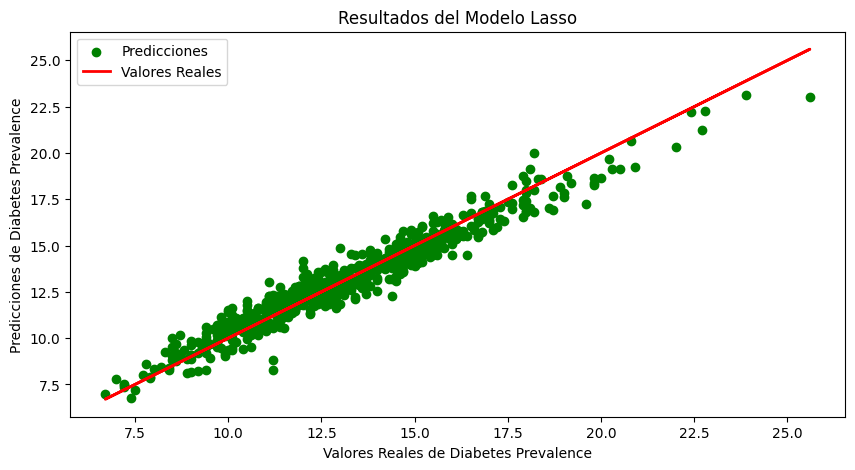

In [10]:
import matplotlib.pyplot as plt

# Gráfico de los resultados de la regresión lineal
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicciones')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Valores Reales')
plt.xlabel('Valores Reales de Diabetes Prevalence')
plt.ylabel('Predicciones de Diabetes Prevalence')
plt.title('Resultados de la Regresión Lineal')
plt.legend()
plt.show()

# Gráfico de los resultados del modelo Lasso
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test_lasso, color='green', label='Predicciones')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Valores Reales')
plt.xlabel('Valores Reales de Diabetes Prevalence')
plt.ylabel('Predicciones de Diabetes Prevalence')
plt.title('Resultados del Modelo Lasso')
plt.legend()
plt.show()